In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
target_questions = [
  'Is the application deadline the same for international students?',
  'Can I apply without formal prerequisite coursework?',
  'Are there teaching or research assistantships available?',
  'What is the typical GPA of admitted students?',
  'What job positions do graduates typically get?',
  'What financial aid options are available for international students?'
]

In [3]:
bot_responses = [
  'Yes, the application deadline of March 1st is the same for both domestic and international students.',
  'While we do prefer to see formal coursework in the prerequisite areas of Inferential Statistics, Linear Algebra, and Programming, you can still apply without it. However, it would be very unlikely for a candidate to be admitted if they lacked such courses in all three subject areas. Keep in mind that you must have completed all required prerequisite courses before the start of the program. You may apply with courses in progress provided that they will be completed by the time the program begins.',
  'Thanks for your question. Unfortunately, the MSDS program does not offer teaching or research assistantships. Due to the programs intensity, we actually recommend that students focus fully on the program and not seek outside work.Regarding financial aid, the program does offer scholarships for admitted candidates, which can cover a maximum of 20 percent of tuition. All admitted students are automatically considered, so there is no separate application required. Please note that these scholarships cannot be combined with other USF scholarships like the Double Dons discount. We dont have specific grants for refugees, so we recommend looking into external funding options.',
  'The average undergraduate GPA of admitted students is 3.43. I hope this is helpful!',
  'Great question! Our graduates typically land positions as data scientists, machine learning engineers, data engineers, and AI engineers. The program focuses on building technical expertise and business acumen, so students are well-prepared for these roles. Also, the nine-month practicum with real companies can be a great resume builder and lead to job opportunities. I hope this helps!',
  'For international students, the MSDS program does offer scholarships for admitted candidates, which can cover a maximum of 20% of tuition. All admitted students are automatically considered for these scholarships, so there is no separate application required. Unfortunately, the Double Dons discount cannot be combined with the program scholarship. Therefore, I recommend also looking into external scholarships or private loans to help finance your education. If you plan to finance your education with a loan, you will need to obtain a letter from your bank stating that they will provide a loan for the needed amount if you are admitted. You can upload this letter to the certification of finances section of the application. If you are unable to provide a letter, please contact asapplication@usfca.edu for other options.'
]

In [4]:
golden_responses = [
  'Yes. This also applies to international students.',
  'We do prefer to see formal coursework in all three areas of prerequisites. It would be very unlikely for a candidate to be admitted if they lacked such courses in all three subject areas.',
  'No, the MSDS program does not offer teaching or research assistantships.',
  'The average undergraduate GPA for admitted students is 3.43',
  'Data Scientist, Machine Learning Engineer, Data Engineer, Software Engineer, Senior Data Scientist, AI Associate, AI/ML Specialist just to name a few',
  'Unfortunately the Double Dons award cannot be stacked with another USF scholarship award, so external scholarships or private loans would be the other financing options for international students'
]

In [5]:
# 1. Calculate TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform on all text to create a common vocabulary
all_text = bot_responses + golden_responses
tfidf_matrix = tfidf_vectorizer.fit_transform(all_text)

# Split the matrix back into bot and golden responses
bot_tfidf = tfidf_matrix[:len(bot_responses)]
golden_tfidf = tfidf_matrix[len(bot_responses):]

In [6]:
similarity_scores = []
for i in range(len(bot_responses)):
    sim = cosine_similarity(bot_tfidf[i:i+1], golden_tfidf[i:i+1])[0][0]
    similarity_scores.append(sim)

In [7]:
# 3. Create a DataFrame with results
results_df = pd.DataFrame({
    'Question': target_questions,
    'Bot Response': bot_responses,
    'Expert Response': golden_responses,
    'Similarity Score': similarity_scores
})

# Sort by similarity score to see which responses match best
results_df_sorted = results_df.sort_values('Similarity Score', ascending=False)

# 4. Print similarity scores for each question
print("Cosine Similarity Scores:")
for i, question in enumerate(target_questions):
    print(f"{i+1}. {question[:50]}...: {similarity_scores[i]:.4f}")

Cosine Similarity Scores:
1. Is the application deadline the same for internati...: 0.3740
2. Can I apply without formal prerequisite coursework...: 0.5266
3. Are there teaching or research assistantships avai...: 0.4053
4. What is the typical GPA of admitted students?...: 0.8173
5. What job positions do graduates typically get?...: 0.2046
6. What financial aid options are available for inter...: 0.2546


In [8]:
average_similarity = np.mean(similarity_scores)
print(f"\nAverage cosine similarity: {average_similarity:.4f}")


Average cosine similarity: 0.4304


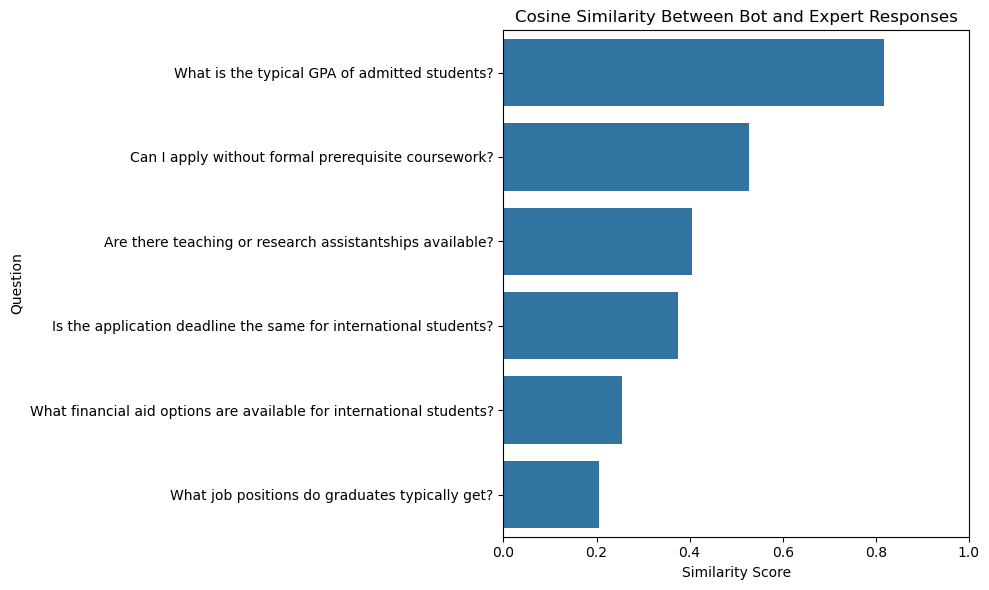

In [9]:
# 6. Visualize the similarities
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score', y='Question', data=results_df_sorted)
plt.title('Cosine Similarity Between Bot and Expert Responses')
plt.xlabel('Similarity Score')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [10]:
# Find the lowest similarity pair
lowest_sim_idx = np.argmin(similarity_scores)
lowest_sim_question = target_questions[lowest_sim_idx]
lowest_sim_bot = bot_responses[lowest_sim_idx]
lowest_sim_expert = golden_responses[lowest_sim_idx]

print("\nDetailed analysis of the lowest similarity pair:")
print(f"Question: {lowest_sim_question}")
print(f"Bot response: {lowest_sim_bot}")
print(f"Expert response: {lowest_sim_expert}")
print(f"Similarity score: {similarity_scores[lowest_sim_idx]:.4f}")


Detailed analysis of the lowest similarity pair:
Question: What job positions do graduates typically get?
Bot response: Great question! Our graduates typically land positions as data scientists, machine learning engineers, data engineers, and AI engineers. The program focuses on building technical expertise and business acumen, so students are well-prepared for these roles. Also, the nine-month practicum with real companies can be a great resume builder and lead to job opportunities. I hope this helps!
Expert response: Data Scientist, Machine Learning Engineer, Data Engineer, Software Engineer, Senior Data Scientist, AI Associate, AI/ML Specialist just to name a few
Similarity score: 0.2046


In [11]:
def compare_key_terms(text1, text2, vectorizer, top_n=10):
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Get term scores for each text
    scores1 = vectorizer.transform([text1]).toarray()[0]
    scores2 = vectorizer.transform([text2]).toarray()[0]
    
    # Create DataFrame with terms and scores
    term_comparison = pd.DataFrame({
        'Term': feature_names,
        'Bot Score': scores1,
        'Expert Score': scores2,
        'Difference': abs(scores1 - scores2)
    })
    
    # Sort by difference
    return term_comparison.sort_values('Difference', ascending=False).head(top_n)

print("\nKey vocabulary differences in lowest similarity pair:")
vocab_diff = compare_key_terms(
    lowest_sim_bot, 
    lowest_sim_expert, 
    tfidf_vectorizer
)
print(vocab_diff)


Key vocabulary differences in lowest similarity pair:
          Term  Bot Score  Expert Score  Difference
45    engineer   0.000000      0.547145    0.547145
46   engineers   0.456192      0.000000    0.456192
122  scientist   0.000000      0.364763    0.364763
61       great   0.304128      0.000000    0.304128
35        data   0.261189      0.469895    0.208706
6           ai   0.130594      0.313263    0.182669
126     senior   0.000000      0.182382    0.182382
85          ml   0.000000      0.182382    0.182382
70        just   0.000000      0.182382    0.182382
128   software   0.000000      0.182382    0.182382
